## JOBMadrid JUNIOR HACKATHON

**Autor**
Sebastián Gamboa Santis. Alumno Ingenieria Electronoca y Comunicaciones, Universidad Complutense de Madrid. España

**Resumen**
Reto de clasificación de machine learning en el que dado un dataset hay que realizar un modelo predictivo empleando random forest

**Datasets**

✅ Training → Este dataset contiene las variables predictoras y el target a predecir con los que entrenar el modelo.

✅ Testing → Este dataset contiene las variables predictoras y el target a predecir con los que entrenar el modelo.

**Evaluación**

La evaluación se basara en los objetivos cumplidos, en la calidad de código y en la documentación.

Dentro de los objetivos las puntuaciones se dividen de la siguiente manera:

Task 1 → 100 ptos

Task 2 → 800 ptos

La valoración de las predicciones de tu modelo se basará en el f1-score macro.



## Importación Librerias python a utilizar

In [30]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura de los datos, de entrenamiento y prueba

Los paquetes de Python Pandas nos ayudan a trabajar con nuestros conjuntos de datos. Comenzamos adquiriendo los conjuntos de datos de entrenamiento y prueba en Pandas DataFrames. 

In [31]:
train_df = pd.read_csv('j0002_train.csv')
test_df = pd.read_csv('j0002_X_test.csv')

## Analisis y descripción de los datos

**Caracteristicas o componentes (columnas) de los datos**

In [32]:
print(train_df.columns.values)

['feature1' 'feature2' 'feature3' 'feature4' 'feature5' 'feature6'
 'target']


**Vista previa de los datos primeros datos e indentificación de caracteristicas categoricas y numericas**

Podemos definir como categorica la caracteristica 'target' y no categoricas el resto 'feature1' 'feature2' 'feature3' 'feature4' 'feature5' 'feature6'

In [33]:
train_df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


**Vista de los ultimos registros del dataset**

In [34]:
train_df.tail()

,feature1,feature2,feature3,feature4,feature5,feature6,target
2095,-0.947002,0.174969,-0.180249,0.118236,-0.143420,-0.359509,0
2096,-1.224148,0.029956,0.536684,0.888406,0.119460,0.378946,1
2097,-0.847593,1.538574,0.962409,1.966467,0.379934,0.737907,3
2098,1.472437,1.187695,1.015766,-1.103522,1.586722,0.182569,4
2099,-0.083489,-1.194784,-0.389204,-2.369081,0.382413,-0.900237,3


**Validación de valores blancos, nulos o vacios, en ambos data set, entrenamiento y prueba**

Ambos data set no tienen valores nulos
El data set de entrenamiento tiene 2 tipos de datos, target (categorico) y el resto numericos.
El data set de prueba tiene 1 tipo de datos, numericos.

In [35]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  2100 non-null   float64
 1   feature2  2100 non-null   float64
 2   feature3  2100 non-null   float64
 3   feature4  2100 non-null   float64
 4   feature5  2100 non-null   float64
 5   feature6  2100 non-null   float64
 6   target    2100 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 115.0 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  900 non-null    float64
 1   feature2  900 non-null    float64
 2   feature3  900 non-null    float64
 3   feature4  900 non-null    float64
 4   feature5  900 non-null    float64
 5   feature6  900 non-null    float64
dtypes: float64(6)
memory usage: 4

**Distribución de los valores numericos en los data set y la confirmación de 4 variables categoricas: 0,1,2,3,4**

In [36]:
train_df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.204656,0.199249,-0.378140,-0.206425,-0.186419,-0.433229,1.980476
std,1.543613,1.614024,1.450548,1.442225,1.501573,1.188791,1.410537
min,-6.683655,-5.383371,-6.147055,-5.653594,-5.912521,-4.433189,0.000000
25%,-1.171340,-0.877386,-1.365990,-1.259403,-1.211685,-1.131944,1.000000
50%,-0.443868,0.320507,-0.439745,-0.176504,-0.195751,-0.406754,2.000000
75%,0.890023,1.321430,0.662898,0.866879,0.851843,0.348593,3.000000
max,4.565547,6.700133,4.157518,4.371912,5.068783,4.016324,4.000000


**Relación que presenta la variable objetivo Target con el resto de campos o caracteristicas**

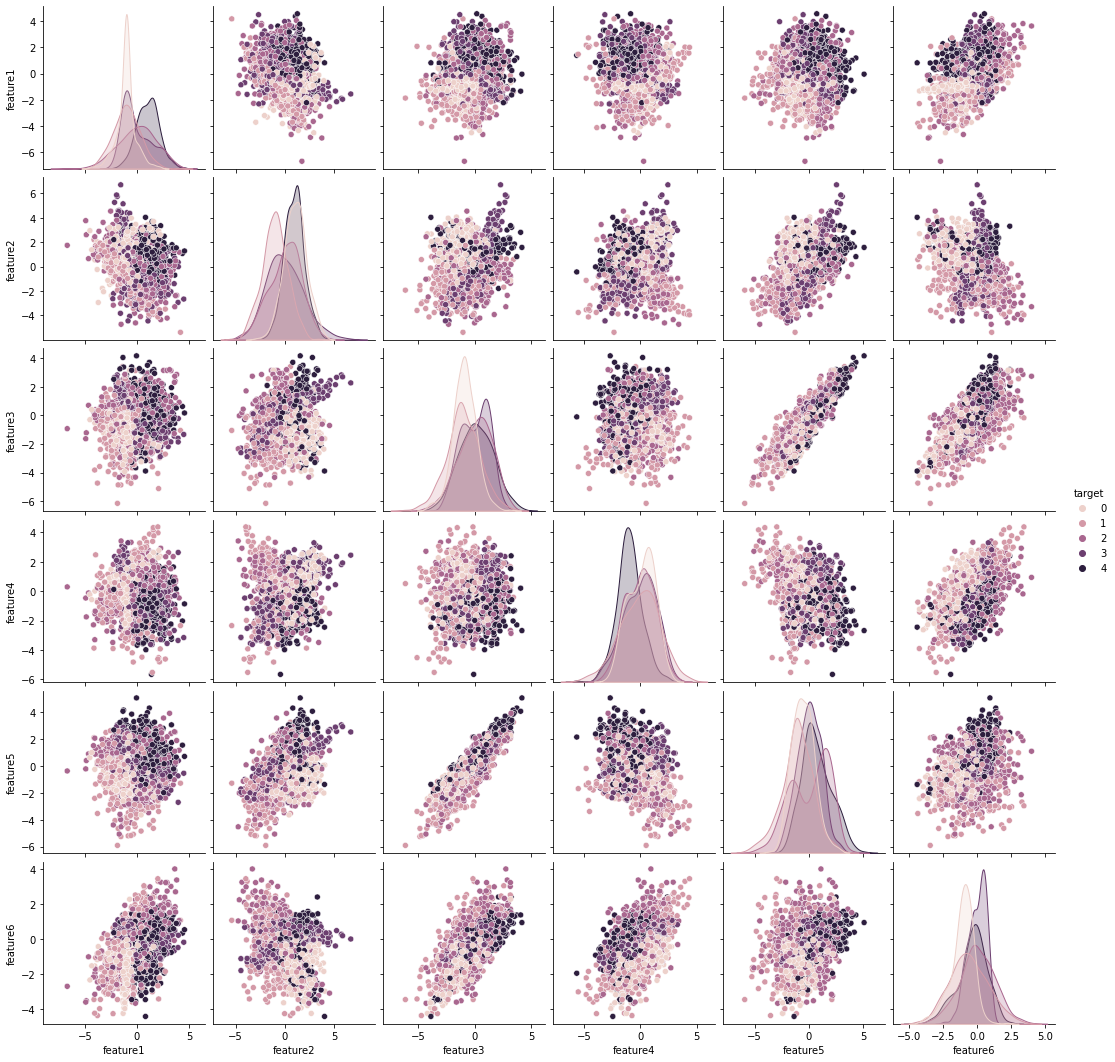

In [37]:
sns.pairplot(train_df,hue='target')

**Vista previa de los datos primeros datos del dataset de prueba**

In [38]:
test_df.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068
2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596
3,-1.134804,0.888585,-1.464499,-1.183056,-0.525729,-1.963822
4,-0.909240,1.575797,0.697212,1.197092,0.486185,0.222644
5,-1.259524,-0.298085,2.043900,-0.945770,2.108906,0.622710
6,1.433834,1.991280,0.537571,1.260210,0.371860,0.633029
7,-1.048317,-0.238468,-1.722257,-1.381502,-0.931728,-1.843310
8,3.179688,-0.132839,1.015864,0.285619,0.654270,1.610692
9,2.355756,-1.503617,-1.531898,-1.944593,-0.901331,-0.698797


## Modelar, predecir y resolver

Ahora estamos listos para entrenar un modelo y predecir la solución requerida, sobre los 5 target identificados. Hay más de 60 algoritmos de modelado predictivo para elegir. Debemos comprender el tipo de problema y el requisito de solución para limitarnos a unos pocos modelos seleccionados que podamos evaluar. Nuestro problema es un problema de clasificación. Queremos identificar la relación entre la salida (0,1,2,3,4) con otras variables o características ('feature1' 'feature2' 'feature3' 'feature4' 'feature5' 'feature6') para posteriormente utilizar ese entrenamiento para predecir el target, pero con los datos de prueba. Estamos realizando aprendizaje supervisado, ya que entrenamos nuestro modelo con un conjunto de datos determinado. 

**El reto**, indica realizar un modelo con **Random Forrest**


## Separación de las variables de entrenamiento:


Realizareos una separación de los datos de en un 77% para entrenamiento y un 33% probar el modelo

In [40]:
from sklearn.model_selection import train_test_split
X=train_df.drop('target',axis=1)
y=train_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

**Random Forests:** Modelo de bosques aleatorios es uno de los más populares. Los bosques aleatorios o los bosques de decisiones aleatorias son un método de aprendizaje por conjuntos para la clasificación, regresión y otras tareas, que operan mediante la construcción de una multitud de árboles de decisión (n_estimators = 100) en el momento del entrenamiento y dando salida a la clase que es el modo de las clases (clasificación) o predicción media (regresión) de los árboles individuales. Referencia [Wikipedia] (https://en.wikipedia.org/wiki/Random_forest).

**Creando y entrenando el modelo Random Forrest**

In [50]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [51]:
rfc.score(X_test,y_test)

0.7619047619047619

**Resultado del entrenamiento reporte de clasificación, matriz de confución en 2 formatos**

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
pred = rfc.predict(X_test)

In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       140
           1       0.78      0.74      0.76       138
           2       0.77      0.68      0.72       136
           3       0.73      0.73      0.73       151
           4       0.72      0.86      0.78       128

    accuracy                           0.76       693
   macro avg       0.76      0.76      0.76       693
weighted avg       0.76      0.76      0.76       693



In [55]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[114   7  10   5   4]
 [ 11 102   7  17   1]
 [  6   8  92   9  21]
 [  5  12   7 110  17]
 [  4   1   3  10 110]]


<AxesSubplot:>

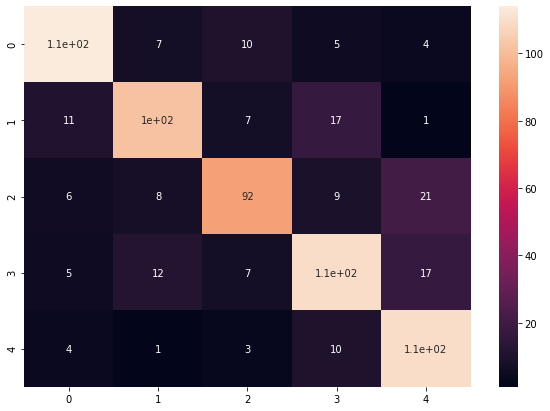

In [56]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

**Predicción con el modelo entrenado sobre los datos del conjunto de pruebas**

In [57]:
predicted_target=rfc.predict(test_df)

### Generación del data frame con la predicción y creación del fichero results.csv 
Incluimos la columna predicción del modelo (**random forrest**) en el el dataset de pruebas, y posteriormente lo guardamos en el fichero de entrega con el nombre results.csv de 1 columna (con el target de la predicción y 900 filas con los valores de tu modelo predictivo.

In [58]:
test_df['target']=predicted_target
test_df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338,1
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068,3
2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596,2
3,-1.134804,0.888585,-1.464499,-1.183056,-0.525729,-1.963822,0
4,-0.909240,1.575797,0.697212,1.197092,0.486185,0.222644,3


Guardamos el resultado del modelo predictivo en el fichero **results.csv**

In [59]:
test_df.to_csv('results.csv')

### Conclusiones
Consideramos que es necesario en un proximo paso realizar normalizado y escalado de datos, y una reducción dimenciaonal (PCA) o selección de caracteristicas (SelecFromModel) para mejorar el modelo.
